# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

df= pd.read_csv("base_final (1).csv")

print("\n📌 Tipos de dados das colunas:")
print(df.dtypes)

print("\n📌 Valores ausentes por coluna:")
print(df.isnull().sum())

df = df.dropna()

x = df.drop(columns=["mau"])
y = df["mau"]

x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

print("\n📌 Tamanhos das bases:")
print(f"Treinamento: {x_treino.shape}, Resposta: {y_treino.shape}")
print(f"Teste: {x_teste.shape}, Resposta: {y_teste.shape}")


📌 Tipos de dados das colunas:
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary 

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

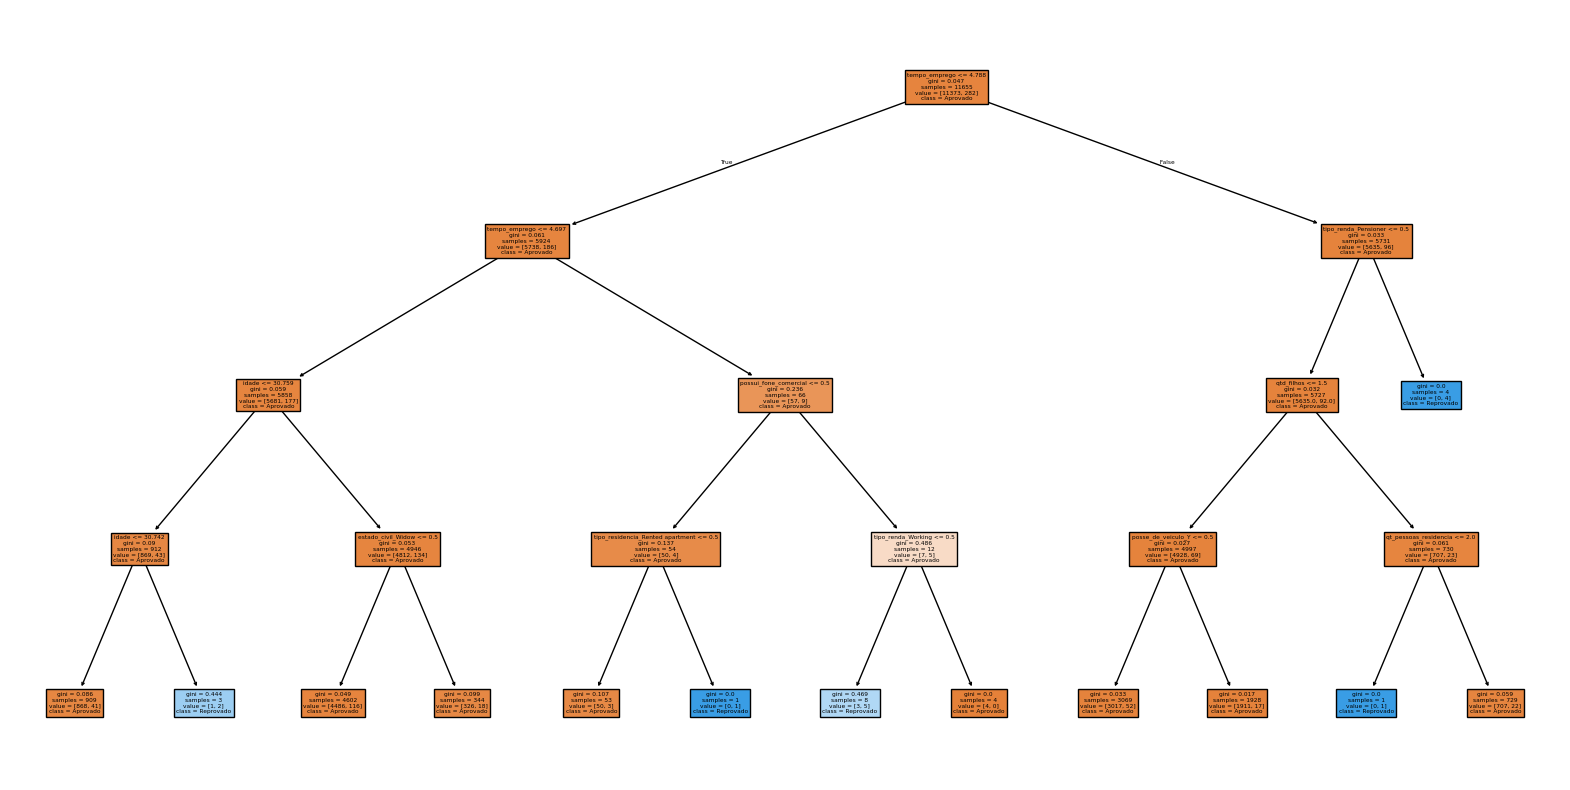

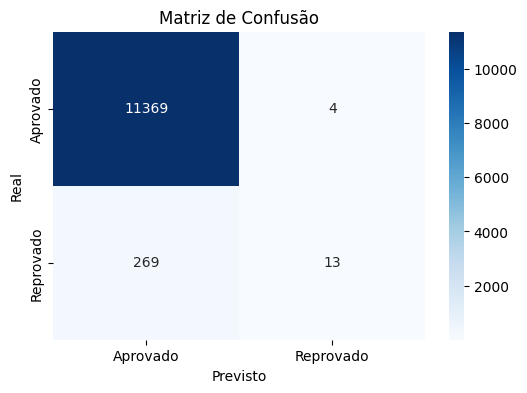

Acurácia na base de treinamento:  0.98


In [24]:
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)

modelo_arvore.fit(x_train, y_train)

y_pred_train = modelo_arvore.predict(x_train)
y_pred_test = modelo_arvore.predict(x_teste)

plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=x_train.columns, class_names=["Aprovado", "Reprovado"])
plt.show()

cm = confusion_matrix(y_train, y_pred_train)
labels = ['Aprovado', 'Reprovado']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

acuracia_treinamento = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {acuracia_treinamento: .2f}")


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

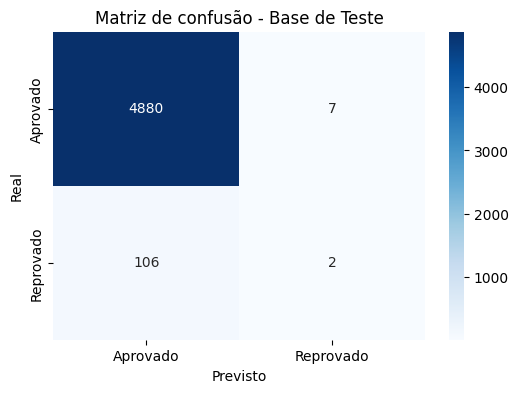

Acurácia na base de teste:  0.98
Acurácia na base de treinamento:  0.98


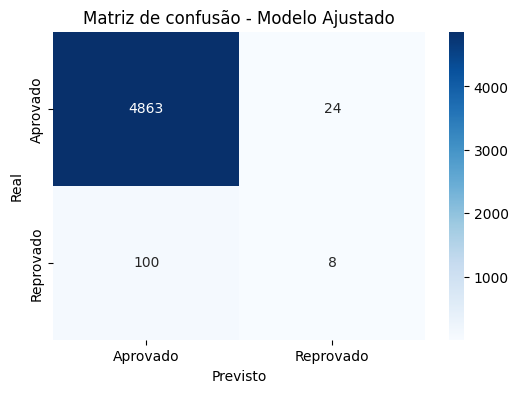

Proporção de classificados como 'maus':  0.01
Acurácia se todos fossem classificando 'bons':  0.98


In [26]:
y_pred_test = modelo_arvore.predict(x_teste)

cm_teste = confusion_matrix(y_teste, y_pred_test)
labels = ["Aprovado", "Reprovado"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_teste, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de confusão - Base de Teste")
plt.show()

acuracia_teste = accuracy_score(y_teste, y_pred_test)
print(f"Acurácia na base de teste: {acuracia_teste: .2f}")

print(f"Acurácia na base de treinamento: {acuracia_treinamento: .2f}")

modelo_arvore_ajustado = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
modelo_arvore_ajustado.fit(x_treino, y_treino)

y_pred_test_ajustado = modelo_arvore_ajustado.predict(x_teste)

cm_teste_ajustado = confusion_matrix(y_teste, y_pred_test_ajustado)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_teste_ajustado, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de confusão - Modelo Ajustado")
plt.show()

proporcao_maus = sum(y_pred_test_ajustado) / len(y_pred_test_ajustado)
print(f"Proporção de classificados como 'maus': {proporcao_maus: .2f}")

y_todos_bons = [0] * len(y_teste)
acuracia_todos_bons = accuracy_score(y_teste, y_todos_bons)
print(f"Acurácia se todos fossem classificando 'bons': {acuracia_todos_bons: .2f}")